## Observations and Insights 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice.
combined_data["Mouse ID"].count()

1893

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
clean = combined_data.drop_duplicates(
  subset = ["Mouse ID", "Timepoint"],
  keep = 'first').reset_index(drop = True)
  
# print latest dataframe
display(clean)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [95]:
dup_mouse = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup_mouse

array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
dm_data = combined_data.loc[combined_data["Mouse ID"]=="g989"]
dm_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
cleaner = combined_data[combined_data["Mouse ID"]!="g989"]
len(cleaner["Mouse ID"].unique())

248

In [102]:
# Checking the number of mice in the clean DataFrame.
cleaner["Mouse ID"].count()

1880

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = cleaner.groupby("Drug Regimen")
grouped_regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = grouped_regimen["Tumor Volume (mm3)"].mean()
drug_median = grouped_regimen["Tumor Volume (mm3)"].median()
drug_variance = grouped_regimen["Tumor Volume (mm3)"].var()
drug_std = grouped_regimen["Tumor Volume (mm3)"].std()
drug_sem = grouped_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance":drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean = grouped_regimen.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
clean
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [66]:
print(cleaner['Drug Regimen'].unique())

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [112]:
regimen_sum = cleaner.groupby(["Drug Regimen"])["Mouse ID"].count()
regimen_sum

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

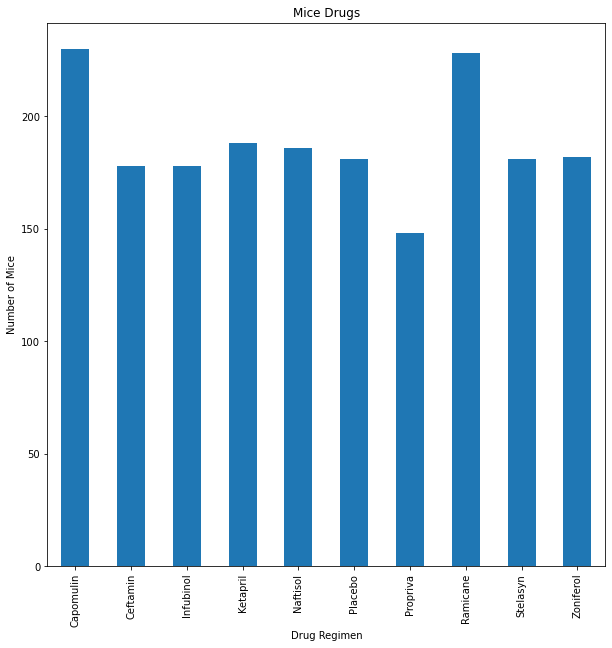

<Figure size 432x288 with 0 Axes>

In [113]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regimen_sum.plot(kind = "bar", figsize=(10,10))

plt.title("Mice Drugs")
plt.ylabel("Number of Mice")

#show chart and set layout
plt.show()
plt.tight_layout()

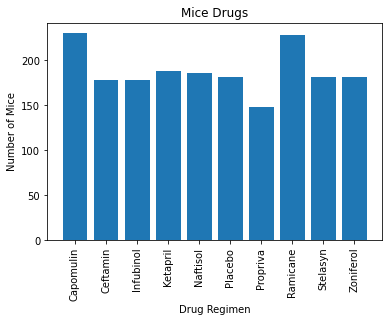

In [117]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(regimen_sum.index.values,regimen_sum.values)

plt.title("Mice Drugs")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)

plt.show()

In [80]:
unique_df = cleaner.loc[:,["Sex"]]


gender_total = unique_df["Sex"].count()
Male = unique_df["Sex"].value_counts()['Male']
Female = unique_df["Sex"].value_counts()['Female']
print(f" Total: {gender_total}\n Male: {Male}\n Female: {Female}\n")

male_percent = (Male/gender_total)
female_percent = (Female/gender_total) 

percentage = pd.DataFrame({"":["Male","Female"],"Total Count":[Male,Female],"Percentage of Players":[male_percent, female_percent]})
percentage.set_index("")

percentage["Percentage of Players"] = percentage["Percentage of Players"].map("{:,.2%}".format)
percentage

 Total: 249
 Male: 125
 Female: 124



,,Total Count,Percentage of Players
0,Male,125,50.20%
1,Female,124,49.80%


In [119]:
g_count = cleaner["Sex"].value_counts()
g_count

Male      958
Female    922
Name: Sex, dtype: int64

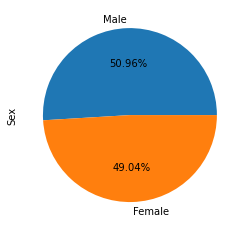

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
g_count.plot(kind="pie",autopct="%1.2f%%")
plt.show()

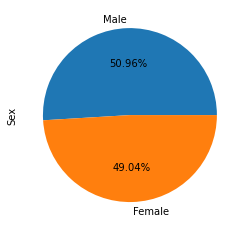

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import numpy as np

plt.pie(g_count.values, labels = g_count.index.values,autopct="%1.2f%%")
plt.ylabel("Sex")
plt.show() 


## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_tumor = cleaner.groupby(["Mouse ID"])["Timepoint"].max()
mouse_tumor = mouse_tumor.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
merged_dataframe = mouse_tumor.merge(cleaner,on=["Mouse ID","Timepoint"],how="left")
merged_dataframe
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list: 
    t_vol = merged_dataframe.loc[merged_dataframe["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_volume.append(t_vol)
    quartiles = t_vol.quantile([.25,.5,.75])
    upper = quartiles[.75]
    lower = quartiles[.25]
    irq = upper-lower
    lbound = lower - (1.5*irq)
    ubound = upper + (1.5*irq)
    outliers = t_vol.loc[(t_vol < lbound)|(t_vol>ubound)]
    print(drug)
    print(outliers)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


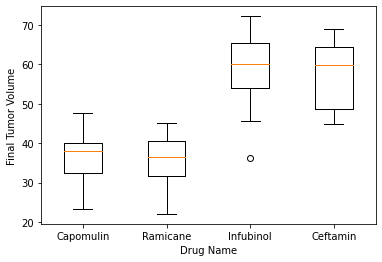

In [141]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_volume,labels = treatment_list)
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Name")
plt.show()

## Line and Scatter Plots

In [139]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.boxplot(tumor_volume,labels = treatment_list)
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Name")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(tumor_volume,labels = treatment_list)
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Name")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
